In [4]:
from pylab import *
ion()  # turn interactive mode on

In [7]:
from prody import *
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
confProDy(auto_show=False)
confProDy(auto_secondary=True)

@> ProDy is configured: auto_show=False
@> ProDy is configured: auto_secondary=True


# Compare and align chains

In [139]:
# Chain alignment doesn't seemt o work. A solution is to save the two chains as temporary PDBs
# and load them as new proteins. This seems to work fine with matchAlign and I get aligned chains
# chain_a = prot.select('chain A')
# chain_b = prot.select('chain B')

# Write chains to temporary PDB files
writePDB('chain_a.pdb', prot.select('chain A'))
writePDB('chain_b.pdb', prot.select('chain B'))

# Open the PDB files
chain_a = parsePDB('chain_a.pdb', compressed=False)
chain_b = parsePDB('chain_b.pdb', compressed=False)

# Remove al HETATOMS keeping only AA atoms
chain_a = chain_a.select('protein')
chain_b = chain_b.select('protein')

# Match and align the chains (2nd var is the target to align to)
results = matchAlign(chain_b, chain_a)
selection, chain_a, chain_b, seqid, overlap = results

@> 4592 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> Secondary structures were assigned to 0 residues.
@> 4573 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> Secondary structures were assigned to 0 residues.
@> Checking AtomGroup chain_b: 1 chains are identified
@> Checking AtomGroup chain_a: 1 chains are identified
@> Trying to match chains based on residue numbers and names:
@>   Comparing Chain B from chain_b (len=543) and Chain A from chain_a (len=543):
@> 	Match: 543 residues match with 100% sequence identity and 100% overlap.
@> Alignment is based on 543 atoms matching 'calpha'.
@> Before alignment RMSD: 69.12
@> After alignment  RMSD: 0.71


@> 4592 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> Secondary structures were assigned to 0 residues.


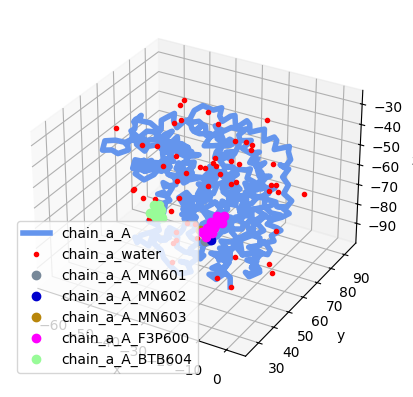

In [140]:
tmp = parsePDB('chain_a.pdb', compressed=False)
showProtein(tmp);
legend();

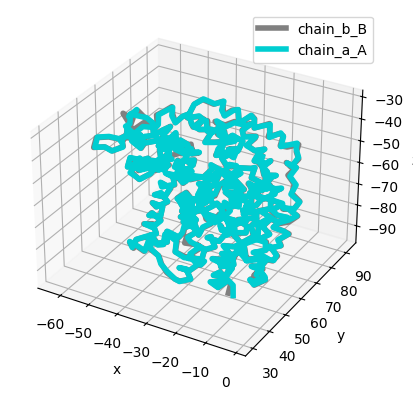

In [141]:
showProtein(chain_a);
showProtein(chain_b);
legend();